<a href="https://colab.research.google.com/github/robbiedh/klasifikasi_movielns/blob/main/tugas_big_data_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

Perusahaan ping merupakan sebuah perusahaan di bidang perfilm yang memberikan layanan nonton film online, untuk itu divisi bisnis meminta seorang data saince untuk mengelompokan pengguna terhadap ratting yang di berikan kepada film


Insight :
mengelompokan pengguna berdasarkan rating


# Karakteristik data


terdapat 3 data :
1. u.data
Dataset Characteristics : Multivariate
Atribut Characteristics : Real, Integer
Number of Instances : 100000 
Number of Attribute : 4


2. u.item
Information about the items (movies); this is a tab separated list of
movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | The last 19 fields are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not; movies can be in several genres at once.  The movie ids are the ones used in the u.data data set.

3. u.genre
A list of the genres.

4. u.user
Demographic information about the users; this is a tab separated list of user id | age | gender | occupation | zip code  The user ids are the ones used in the u.data data set.

# Spark Installation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
# !wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf /content/drive/MyDrive/GoogleColab/spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [3]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 64kB/s 
     |████████████████████████████████| 204kB 40.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=f37f3fa5ad3c2f923b2b67ea95f8baa04844126bd07a93eba3c71454ede3a2ad
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [4]:
import findspark
findspark.init()

In [5]:
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [6]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
cftime==1.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
spark

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
from math import sqrt
from random import randrange
# import lib python data analysis
import pandas as pd
from random import seed
import matplotlib.pyplot as plt
import networkx as nx
from csv import reader
from math import sqrt

from  __future__ import division



# Exploring data

In [11]:
dataping = spark.read.format("csv").option("delimiter", "|").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.genre")

In [12]:
dataping.show(20, False)

+-----------+---+
|_c0        |_c1|
+-----------+---+
|unknown    |0  |
|Action     |1  |
|Adventure  |2  |
|Animation  |3  |
|Children's |4  |
|Comedy     |5  |
|Crime      |6  |
|Documentary|7  |
|Drama      |8  |
|Fantasy    |9  |
|Film-Noir  |10 |
|Horror     |11 |
|Musical    |12 |
|Mystery    |13 |
|Romance    |14 |
|Sci-Fi     |15 |
|Thriller   |16 |
|War        |17 |
|Western    |18 |
+-----------+---+



In [13]:
dataping = spark.read.format("csv").option("delimiter", "|").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.genre")
dataping .show(20, False)

+-----------+---+
|_c0        |_c1|
+-----------+---+
|unknown    |0  |
|Action     |1  |
|Adventure  |2  |
|Animation  |3  |
|Children's |4  |
|Comedy     |5  |
|Crime      |6  |
|Documentary|7  |
|Drama      |8  |
|Fantasy    |9  |
|Film-Noir  |10 |
|Horror     |11 |
|Musical    |12 |
|Mystery    |13 |
|Romance    |14 |
|Sci-Fi     |15 |
|Thriller   |16 |
|War        |17 |
|Western    |18 |
+-----------+---+



user id | age | gender | occupation | zip code

In [14]:
dataping = spark.read.format("csv").option("delimiter", "|").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.user")
dataping.show(20, False)

+---+---+---+-------------+-----+
|_c0|_c1|_c2|_c3          |_c4  |
+---+---+---+-------------+-----+
|1  |24 |M  |technician   |85711|
|2  |53 |F  |other        |94043|
|3  |23 |M  |writer       |32067|
|4  |24 |M  |technician   |43537|
|5  |33 |F  |other        |15213|
|6  |42 |M  |executive    |98101|
|7  |57 |M  |administrator|91344|
|8  |36 |M  |administrator|05201|
|9  |29 |M  |student      |01002|
|10 |53 |M  |lawyer       |90703|
|11 |39 |F  |other        |30329|
|12 |28 |F  |other        |06405|
|13 |47 |M  |educator     |29206|
|14 |45 |M  |scientist    |55106|
|15 |49 |F  |educator     |97301|
|16 |21 |M  |entertainment|10309|
|17 |30 |M  |programmer   |06355|
|18 |35 |F  |other        |37212|
|19 |40 |M  |librarian    |02138|
|20 |42 |F  |homemaker    |95660|
+---+---+---+-------------+-----+
only showing top 20 rows



In [15]:
dataping = spark.read.format("csv").option("delimiter", "|").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.item")
dataping.show(20, False)

+---+----------------------------------------------------+-----------+----+-------------------------------------------------------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|_c1                                                 |_c2        |_c3 |_c4                                                                |_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+----------------------------------------------------+-----------+----+-------------------------------------------------------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|1  |Toy Story (1995)                                    |01-Jan-1995|null|http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)              |0  |0  |0  |1  |1  |1   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |0   |
|2  |GoldenEye (1995)                                    |01-Jan

movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |

In [16]:
dataping = spark.read.format("csv").option("delimiter", "|").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.data")
dataping.show(20, False)

+--------------------+
|_c0                 |
+--------------------+
|196	242	3	881250949 |
|186	302	3	891717742 |
|22	377	1	878887116  |
|244	51	2	880606923  |
|166	346	1	886397596 |
|298	474	4	884182806 |
|115	265	2	881171488 |
|253	465	5	891628467 |
|305	451	3	886324817 |
|6	86	3	883603013    |
|62	257	2	879372434  |
|286	1014	5	879781125|
|200	222	5	876042340 |
|210	40	3	891035994  |
|224	29	3	888104457  |
|303	785	3	879485318 |
|122	387	5	879270459 |
|194	274	2	879539794 |
|291	1042	4	874834944|
|234	1184	2	892079237|
+--------------------+
only showing top 20 rows



user id | item id | rating | timestamp.

# Install Joblibspark

In [17]:
!pip install joblibspark

In [18]:
!pip install pyspark>=3.0.0 joblibspark

In [19]:
from joblibspark import register_spark
from sklearn.utils import parallel_backend
register_spark() # register spark backend

# Data Prosesing with pandas

In [20]:
data = pd.read_csv("/content/drive/MyDrive/GoogleColab/ml-100k/u.data",sep="\t", names=["userId", "movieId", "rating", "timestamp"]) 

In [21]:
data

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [22]:
data.pivot(
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing spark

In [23]:
data = spark.read.format("csv").option("delimiter", "	").option("header", "false").load("/content/drive/MyDrive/GoogleColab/ml-100k/u.data").toDF("userId", "itemId", "rating", "timestamp").limit(200)

In [57]:
data.show(5, False)

+------+------+------+---------+
|userId|itemId|rating|timestamp|
+------+------+------+---------+
|196   |242   |3     |881250949|
|186   |302   |3     |891717742|
|22    |377   |1     |878887116|
|244   |51    |2     |880606923|
|166   |346   |1     |886397596|
+------+------+------+---------+
only showing top 5 rows



In [25]:
data.printSchema()

root
 |-- userId: string (nullable = true)
 |-- itemId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)



In [26]:
from pyspark.sql.types import IntegerType
data = data.withColumn("userId", data["userId"].cast(IntegerType()))
data = data.withColumn("itemId", data["itemId"].cast(IntegerType()))
data = data.withColumn("rating", data["rating"].cast(IntegerType()))

In [27]:
data.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- itemId: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- timestamp: string (nullable = true)



In [28]:
data.show(20, False)

+------+------+------+---------+
|userId|itemId|rating|timestamp|
+------+------+------+---------+
|196   |242   |3     |881250949|
|186   |302   |3     |891717742|
|22    |377   |1     |878887116|
|244   |51    |2     |880606923|
|166   |346   |1     |886397596|
|298   |474   |4     |884182806|
|115   |265   |2     |881171488|
|253   |465   |5     |891628467|
|305   |451   |3     |886324817|
|6     |86    |3     |883603013|
|62    |257   |2     |879372434|
|286   |1014  |5     |879781125|
|200   |222   |5     |876042340|
|210   |40    |3     |891035994|
|224   |29    |3     |888104457|
|303   |785   |3     |879485318|
|122   |387   |5     |879270459|
|194   |274   |2     |879539794|
|291   |1042  |4     |874834944|
|234   |1184  |2     |892079237|
+------+------+------+---------+
only showing top 20 rows



In [46]:
data_train, data_test = data.randomSplit([0.7, 0.3], seed=42)
data_train.cache()

DataFrame[userId: int, itemId: int, rating: int, timestamp: string]

Implementasi KMeans Spark sedikit berbeda dari misalnya versi scikit-learn. Kita perlu menyimpan semua fitur sebagai array float, dan menyimpan array ini sebagai kolom yang disebut "fitur". Karena kami tidak lagi membutuhkan kolom asli, kami memfilternya dengan pernyataan pilih.

In [40]:
from pyspark.ml.feature import VectorAssembler
FEATURES_COL = [ 'itemId', 'rating']
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(data_train).select('userId', 'features')
df_kmeans.show()

+------+-----------+
|userId|   features|
+------+-----------+
|     5|  [2.0,3.0]|
|     6| [86.0,3.0]|
|     7|[455.0,4.0]|
|     7|[479.0,4.0]|
|     8|[338.0,4.0]|
|    10|[486.0,4.0]|
|    13|[272.0,4.0]|
|    13|[526.0,3.0]|
|    13|[836.0,2.0]|
|    22|[377.0,1.0]|
|    25|[181.0,5.0]|
|    26|[258.0,3.0]|
|    28|[209.0,4.0]|
|    38| [95.0,5.0]|
|    42| [96.0,5.0]|
|    42|[403.0,3.0]|
|    42|[423.0,5.0]|
|    44|[195.0,5.0]|
|    49|[559.0,2.0]|
|    57|[419.0,3.0]|
+------+-----------+
only showing top 20 rows



# Evaluate Model

Optimize choice of k
Salah satu kelemahan KMeans dibandingkan dengan algoritma clustering lain yang lebih maju adalah bahwa algoritma harus diberitahu berapa banyak cluster, k, yang harus dicari. Untuk mengoptimalkan k, kami mengelompokkan sebagian kecil data untuk pilihan k yang berbeda dan mencari "elbow" dalam cost.

In [30]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    predictions = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    cost[k] = str(silhouette)

Text(0, 0.5, 'cost')

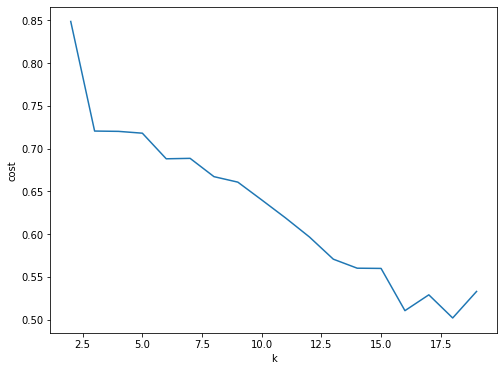

In [31]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [54]:
k = 13
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()
predictions = model.transform(df_kmeans)

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[305.35   3.45]
[496.04545455   3.72727273]
[1281.            1.66666667]
[22.69230769  3.46153846]
[919.   4.]
[654.57142857   3.71428571]
[786.88888889   2.77777778]
[152.66666667   4.33333333]
[1037.6    3.2]
[102.81818182   3.81818182]
[397.4   3.6]
[225.29411765   3.94117647]
[1161.            3.33333333]


evaluatuion dengan Silhouette Coefficient digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik suatu objek ditempatkan
dalam suatu cluster. 

In [56]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(silhouette)

0.7647387903755237


In [33]:
transformed = model.transform(df_kmeans).select('userId', 'prediction')
rows = transformed.collect()
print(rows[:3])

[Row(userId=196, prediction=5), Row(userId=186, prediction=0), Row(userId=22, prediction=9)]


In [34]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)
from pyspark.sql import SQLContext
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()

+------+----------+
|userId|prediction|
+------+----------+
|   196|         5|
|   186|         0|
|    22|         9|
|   244|        12|
|   166|         0|
|   298|        11|
|   115|         5|
|   253|        11|
|   305|        11|
|     6|         2|
|    62|         5|
|   286|         7|
|   200|        10|
|   210|        12|
|   224|        12|
|   303|         8|
|   122|         9|
|   194|         5|
|   291|         4|
|   234|         4|
+------+----------+
only showing top 20 rows



In [35]:
df_pred = df_pred.join(data, 'userId')
df_pred.show(50)

+------+----------+------+------+---------+
|userId|prediction|itemId|rating|timestamp|
+------+----------+------+------+---------+
|   196|         5|   242|     3|881250949|
|   186|         0|   302|     3|891717742|
|    22|         9|   377|     1|878887116|
|   244|        12|   756|     2|880605157|
|   244|        12|   815|     4|880605185|
|   244|        12|    51|     2|880606923|
|   166|         0|   328|     5|886397722|
|   166|         0|   346|     1|886397596|
|   298|        11|   281|     3|884183336|
|   298|        11|   317|     4|884182806|
|   298|        11|   474|     4|884182806|
|   115|         5|    20|     3|881171009|
|   115|         5|   265|     2|881171488|
|   253|        11|   465|     5|891628467|
|   305|        11|   117|     2|886324028|
|   305|        11|   427|     5|886323090|
|   305|        11|   451|     3|886324817|
|     6|         2|    86|     3|883603013|
|    62|         5|    21|     3|879373460|
|    62|         5|   382|     3

In [36]:
pddf_pred = df_pred.toPandas()
pddf_pred.head()

,userId,prediction,itemId,rating,timestamp
0,196,5,242,3,881250949
1,186,0,302,3,891717742
2,22,9,377,1,878887116
3,244,12,756,2,880605157
4,244,12,815,4,880605185
